## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mice_count = len(merge_df["Mouse ID"].unique())
print(f"Number of mice included in the dataset: {mice_count}")

Number of mice included in the dataset: 249


In [4]:
# Check the data for ANY MOUSE ID WITH DUPLICATE TIME POINTS and REMOVE ANY DATA ASSOCIATED WITH THAT MOUSE ID.
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID = merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicate_mouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
# stackoverflow resource: https://stackoverflow.com/questions/53182464/pandas-delete-a-row-in-a-dataframe-based-on-a-value
clean_df = merge_df.drop(duplicate_mouseID.index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_df["Mouse ID"].unique())
if mice_count_clean == mice_count:
    print(f"Not all duplicates were cleaned!!!")
else:
    print(f"Number of mice included in the cleaned dataset: {mice_count_clean}")

Number of mice included in the cleaned dataset: 248


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
vars = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stds =clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

tumor_volume_stats=pd.DataFrame({'Tumor Volume Mean': means,
                       'Tumor Volume Median': medians,
                       'Tumor Volume Var': vars,
                       'Tumor Volume Std': stds,
                       'Tumor Volume SEM': sems})
tumor_volume_stats.sort_values("Drug Regimen")

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume Std,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
clean_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

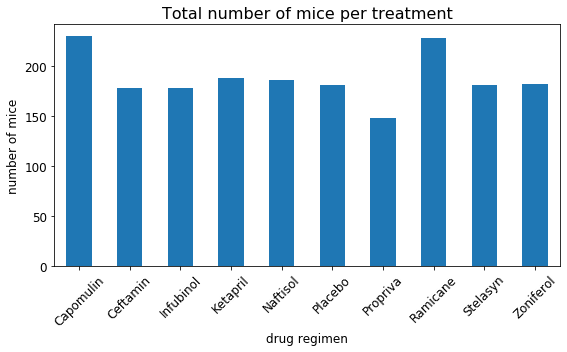

In [78]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_regimes = clean_df['Drug Regimen'].unique()
mice_count = pd.DataFrame(clean_df.groupby("Drug Regimen").count()["Mouse ID"])
mice_count.plot(kind='bar', figsize=(8,5), fontsize=12, legend=False)
plt.title("Total number of mice per treatment",fontsize = 16)
plt.ylabel("number of mice", fontsize =12)
plt.xlabel("drug regimen", fontsize =12)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show();



In [79]:
mice_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


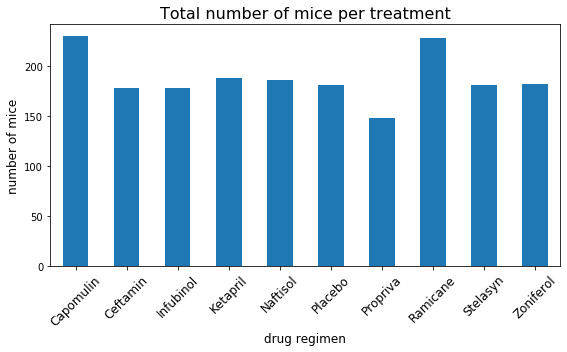

In [96]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(mice_count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, mice_count['Mouse ID'], align="center", width=0.5)
plt.xticks(tick_locations, mice_count.index, rotation=45, fontsize=12)
plt.title("Total number of mice per treatment", fontsize = 16)
plt.ylabel("number of mice", fontsize =12)
plt.xlabel("drug regimen", fontsize =12)
plt.xlim(-0.5, len(x_axis)-0.5)
plt.tight_layout()
plt.show();

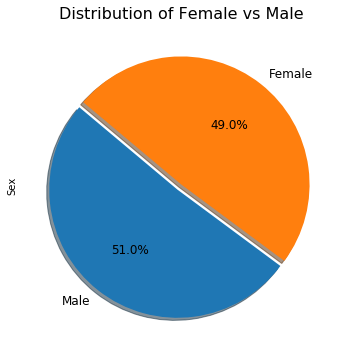

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender=clean_df['Sex'].value_counts()
mice_gender.plot(kind='pie', fontsize=12, figsize=(8,5), legend=False, explode = (0.05,0), autopct="%1.1f%%", 
                 shadow=True, startangle=140)
plt.title("Distribution of Female vs Male", loc='center', fontsize = 16)
plt.tight_layout()
plt.show();

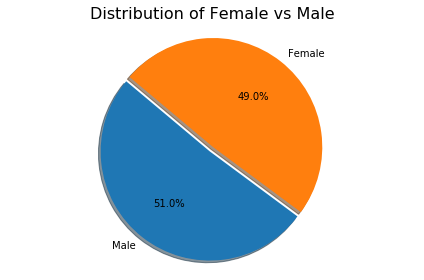

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, explode = (0.05,0), autopct="%1.1f%%", shadow=True, labels=list(mice_gender.index),
        startangle=140)
plt.title("Distribution of Female vs Male", loc='center', fontsize = 16)
plt.axis('equal')
plt.tight_layout()
plt.show();

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
